# **Data Cleaning  Code- Team 8-  Netflix Project**
### Project 1- UMN Data Bootcamp
- Satya Sakuntala NagaSravya Mattapalli
- Edith Lotterman
- Kevin Ybarra
- Zack Crowley

In [2]:
# Dependencies:
import numpy as np
import pandas as pd
import scipy.stats as stat
from matplotlib import pyplot as plt, dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt
from config import api_key
from pprint import pprint
import requests
import math


In [ ]:
# Data 
# global netflix data from netflix.com top 10 weekly shows
global_netflix_df = pd.read_csv("Resources/all-weeks-global.csv")
global_netflix_df.head()
global_netflix_df.dtypes

# Netflix Title data from kaggle.com- has title, info, imdb ratings, etc.
titles_netflix_df = pd.read_csv("Resources/titles.csv")
titles_netflix_df.head()
titles_netflix_df.dtypes

# Merge 
global_titles_df = pd.merge(global_netflix_df, titles_netflix_df, how= "left", left_on="show_title", right_on="title")
global_titles_df.drop(["title","tmdb_popularity","tmdb_score"], axis=1, inplace=True)
global_titles_df

In [ ]:
# Changing all NAN values to NA in global_titles_df for easy referencing 
df = global_titles_df.fillna("NA")
df
# filtering data where imdb_score is NA and respective show title
df1 = df.loc[df["imdb_score"]=="NA","show_title"]
# Created the movie list with unique movie/show names
movies_list = df1.unique().tolist()
# Total number of unique movies/shows
len(movies_list)

### OMDB API Call:

In [ ]:
# Set url for OMDB API call and api_key:
url = "http://www.omdbapi.com/?t="
str_api_key = f"&apikey={api_key}"

In [ ]:
# List that has unique movie/show names
movies_list
# Empty list to store fetched data from API
data = []

# looping through the movie list and fetching data for each movie
for movie in movies_list:
    try:
        response = requests.get(url+movie+str_api_key).json()
        # Appending data to the list
        data.append({"show_title":response["Title"],
                    "id" :response["imdbID"],"type":response["Type"],"description":response["Plot"],
                    "release_year":response["Year"],"age_certification":response["Rated"],"runtime":response["Runtime"],
                    "genres":response["Genre"],"production_countries":response["Country"],"imdb_id":response["imdbID"],
                    "imdb_score":response["imdbRating"],"imdb_votes":response["imdbVotes"]})
    except KeyError:
        pass

In [ ]:
# Converting the data fetched from API in to the dataframe
df3 = pd.DataFrame(data)
df3
# Exporting data fetched from the API to csv file so it is saved:
df3.to_csv("output_data/api_data.csv")

In [ ]:
# merged the data fetched from API DF(df3) with the dataframe we hav(global_titles_df)
#changing all show titles into lower case 
global_titles_df["Show_title"]=global_titles_df['show_title'].str.lower()
df3["Show_title"]=df3['show_title'].str.lower()

merge_df = pd.merge(global_titles_df, df3, how= "left",on="Show_title")
# combining the data and storing it in separate column.(eg:combined type_x,type_y into one column type) and data cleaning
combined_df = merge_df.assign(type=merge_df.type_x.fillna(merge_df.type_y))
combined_df = combined_df.assign(description=merge_df.description_x.fillna(merge_df.description_y))
combined_df = combined_df.assign(release_year=merge_df.release_year_x.fillna(merge_df.release_year_y))
combined_df = combined_df.assign(age_certification=merge_df.age_certification_x.fillna(merge_df.age_certification_y))
combined_df = combined_df.assign(runtime=merge_df.runtime_x.fillna(merge_df.runtime_y))
combined_df = combined_df.assign(genres=merge_df.genres_x.fillna(merge_df.genres_y))
combined_df = combined_df.assign(production_countries=merge_df.production_countries_x.fillna(merge_df.production_countries_y))
combined_df = combined_df.assign(imdb_id=merge_df.imdb_id_x.fillna(merge_df.imdb_id_y))
combined_df = combined_df.assign(imdb_score=merge_df.imdb_score_x.fillna(merge_df.imdb_score_y))
combined_df = combined_df.assign(imdb_votes=merge_df.imdb_votes_x.fillna(merge_df.imdb_votes_y))
#dropping used columns
combined_df.drop(["show_title_x","show_title_y","id_x","id_y","type_x","type_y","description_x","description_y","release_year_x",
                "release_year_y","age_certification_x","age_certification_y","runtime_x","runtime_y","genres_x","genres_y",
                "production_countries_x","production_countries_y","imdb_id_x","imdb_id_y","imdb_score_x","imdb_score_y",
                "imdb_votes_x","imdb_votes_y","season_title","seasons"], axis=1, inplace=True)
#dropped all rows that has NAN values 
combined_df = combined_df.dropna()
# Dropped all rows that has imdb_score equal to N/A
cleaned_df = combined_df.loc[combined_df["imdb_score"]!="N/A"]
cleaned_df = combined_df.loc[combined_df["runtime"]!="N/A"]
cleaned_df = combined_df.loc[combined_df["age_certification"]!="N/A"]
#saving the dataframe into csv file
cleaned_df.to_csv("output_data/cleaned_netflix_data.csv")
print(cleaned_df.count())
cleaned_df

In [ ]:
# Read in cleaned data set for more processing:
netflix_df = pd.read_csv("output_data/cleaned_netflix_data.csv")
netflix_df.head()


## **Data Cleaning**

In [6]:
# Data 
# global netflix data from netflix.com top 10 weekly shows
netflix_df = pd.read_csv("cleaned_netflix_data.csv")
# Clean week date, save as datetype and make a month_year col var:
netflix_df['week'] = pd.to_datetime(netflix_df['week'])
netflix_df['month_year']= netflix_df['week'].dt.to_period('M')
print(netflix_df.dtypes)
netflix_df.head()


week                          datetime64[ns]
category                              object
weekly_rank                            int64
weekly_hours_viewed                    int64
cumulative_weeks_in_top_10             int64
Show_title                            object
type                                  object
description                           object
release_year                           int64
age_certification                     object
runtime_mins                         float64
genres                                object
production_countries                  object
imdb_id                               object
imdb_score                           float64
imdb_votes                           float64
drama                                  int64
comedy                                 int64
action                                 int64
family                                 int64
crime                                  int64
romance                                int64
month_year

,week,category,weekly_rank,weekly_hours_viewed,cumulative_weeks_in_top_10,Show_title,type,description,release_year,age_certification,...,imdb_id,imdb_score,imdb_votes,drama,comedy,action,family,crime,romance,month_year
0,2022-10-30,Films (English),1,68310000,1,the good nurse,movie,An infamous caregiver is implicated in the dea...,2022,R,...,tt4273800,7.1,204.0,1,0,0,0,1,0,2022-10
1,2022-10-30,Films (English),2,41950000,2,the school for good and evil,movie,Best friends Sophie and Agatha find themselves...,2022,PG-13,...,tt2935622,5.8,18952.0,1,1,1,0,0,0,2022-10
2,2022-10-30,Films (English),3,9170000,2,the stranger,SHOW,A web of secrets sends family man Adam Price o...,2020,TV-MA,...,tt9698480,7.3,48298.0,1,0,0,0,1,0,2022-10
3,2022-10-30,Films (English),4,8890000,1,wild is the wind,movie,An immigrant Nevada rancher brings a woman fro...,1957,Not Rated,...,tt0051193,6.7,1027.0,1,0,0,0,0,0,2022-10
4,2022-10-30,Films (English),5,8170000,3,the curse of bridge hollow,movie,"A teenage girl, who accidentally releases an a...",2022,TV-14,...,tt15289240,0.0,4085.0,0,1,0,1,0,0,2022-10


In [ ]:
# Count all vars:
netflix_df.count()


In [5]:
# Clean week date and make a month_year col var:
netflix_df['week'] = pd.to_datetime(netflix_df['week'])
netflix_df['month_year']= netflix_df['week'].dt.to_period('M')

In [ ]:
# Fix runtime, genre and production_country:
# Genre:
genre = netflix_df["genres"]
netflix_df["genres"] = netflix_df["genres"].str.lower()
netflix_df["genres"] = netflix_df["genres"].str.replace("[", "").str.replace("\'", "").str.replace("]", "")
print(netflix_df["genres"])

In [ ]:
# age_certification:
netflix_df["age_certification"].unique()

In [ ]:
# Change imdb_votes to float:
netflix_df['imdb_votes'] = netflix_df['imdb_votes'].str.replace(",","").astype(float)
netflix_df['imdb_votes'].dtypes 

# change imdb_score and imdb_votes to drop nan's:
# First change to str:
# imdb_score
netflix_df["imdb_score"]= netflix_df["imdb_score"].astype(str)
netflix_df.loc[netflix_df["imdb_score"]=="nan"].count()["imdb_score"]
netflix_df["imdb_score"] = netflix_df["imdb_score"].replace("nan", "0")
netflix_df["imdb_score"]= netflix_df["imdb_score"].astype(float)

# imdb_score
netflix_df["imdb_votes"]= netflix_df["imdb_votes"].astype(str)
netflix_df.loc[netflix_df["imdb_votes"]=="nan"].count()["imdb_votes"]
netflix_df["imdb_votes"] = netflix_df["imdb_votes"].replace("nan", "0")
netflix_df["imdb_votes"]= netflix_df["imdb_votes"].astype(float)


In [ ]:
#add an indicator var for each of the following from the genres column,  if contained in 'genres' then 1, otherwise 0:
netflix_df['drama'] = netflix_df['genres'].str.contains('drama').astype(int)
netflix_df['comedy'] = netflix_df['genres'].str.contains('comedy').astype(int)
netflix_df['action'] = netflix_df['genres'].str.contains('action').astype(int)
netflix_df['family'] = netflix_df['genres'].str.contains('family').astype(int)
netflix_df['crime'] = netflix_df['genres'].str.contains('crime').astype(int)
netflix_df['romance'] = netflix_df['genres'].str.contains('romance').astype(int)

In [ ]:
# Runtime, make all float type and rename, all in minutes:
netflix_df["runtime"] = netflix_df["runtime"].str.rstrip(' min').str.rstrip('.0')
netflix_df["runtime"] = netflix_df["runtime"].replace(np.nan, "0").replace("","0")
netflix_df["runtime"] = netflix_df["runtime"].astype(float)
netflix_df["runtime"].unique()
# Rename col to specifiy runtime is in minutes:
netflix_df.rename({'runtime': 'runtime_mins'}, axis=1, inplace=True)


In [ ]:
# Year (just the first 4 char)):
netflix_df["release_year"] = netflix_df["release_year"].str[:4]
netflix_df["release_year"] 

In [ ]:
# production_country:
# netflix_df["production_countries"].unique()
netflix_df["production_countries"] = netflix_df["production_countries"].str.replace("[", "").str.replace("\'", "").str.str.replace("]", "")("]", "")

netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("US","United States")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("AU","Australia")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("GB","United Kingdom")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("CA","Canada")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("JP","Japan")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("KR","South Korea")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("ES","Spain")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("ES","Spain")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("CZ","Czech Republic")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("MX","Mexico")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("IT","Italy")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("LU","Luxembourg")    
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("IN","India")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("PL","Poland")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("DE","Germany")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("BE","Belgium")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("TR","Turkey")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("ZA","South Africa")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("CL","Chile")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("NG","Nigeria")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("KN","Saint Kitts and Nevis")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("CO","Columbia")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("BG","Bulgaria")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("FR","France")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("AR","Argentina")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("AT","Austria")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("BR","Brazil")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("QA","Qatar")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("CH","Switzerland")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("HU","Hungary")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("PE","Peru")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("DK","Denmark")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("LT","Lithuania")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("GR","Greece")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("IE","Ireland")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("IL","Israel")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("IS","Iceland")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("JO","Jordan")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("NL","Netherlands")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("HK","Hong Kong")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("NZ","New Zealand")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("SE","Sweden")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("SG","Singaport")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("RO","Romania")
netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("TH","Thailand")

prod_cntry = netflix_df["production_countries"]
prod_cntry.unique()

In [9]:
# Export csv:
# print(netflix_df.dtypes)
# netflix_df.to_csv("cleaned_netflix_data.csv", index=False)

week                          datetime64[ns]
category                              object
weekly_rank                            int64
weekly_hours_viewed                    int64
cumulative_weeks_in_top_10             int64
Show_title                            object
type                                  object
description                           object
release_year                           int64
age_certification                     object
runtime_mins                         float64
genres                                object
production_countries                  object
imdb_id                               object
imdb_score                           float64
imdb_votes                           float64
drama                                  int64
comedy                                 int64
action                                 int64
family                                 int64
crime                                  int64
romance                                int64
month_year

## **Analysis- Exploratory**:
#### Correlations: 
- runtime and imdb rating or votes
- age_certification and imdb score or votes 

In [82]:
# Create df's for each of the 4 categories: Show/film and English/Non-English
# var = category
eng_film_df = netflix_df.loc[netflix_df["category"]=="Films (English)"]
eng_show_df = netflix_df.loc[netflix_df["category"]=="TV (English)"]
non_eng_film_df = netflix_df.loc[netflix_df["category"]=="Films (Non-English)"]
non_eng_show_df = netflix_df.loc[netflix_df["category"]=="TV (Non-English)"]

# Count all:
print(f"English Films:",eng_film_df["Show_title"].nunique())
print(f"English Show:",eng_show_df["Show_title"].nunique())
print(f"Non-English Films:",non_eng_film_df["Show_title"].nunique())
print(f"Non-English Show:",non_eng_show_df["Show_title"].nunique())
# Not a lot of Non-english films by comparison.
print(f"total unique shows:",eng_film_df["Show_title"].nunique() + eng_show_df["Show_title"].nunique() + 
                            non_eng_film_df["Show_title"].nunique()+non_eng_show_df["Show_title"].nunique())

English Films: 263
English Show: 152
Non-English Films: 92
Non-English Show: 139
total unique shows: 646


In [ ]:
# Plot Overall for whole data set- runtime versus imdb rating on a scatterplot
plt.scatter(netflix_df["runtime_mins"],netflix_df["imdb_score"])
plt.xlabel('runtime (mins)')
plt.ylabel('imdb_score')
plt.show()



In [ ]:
# Overall corr for whole data set:
corr_runtime_score_all = stat.pearsonr(netflix_df["runtime_mins"],netflix_df["imdb_score"])
print(corr_runtime_score_all)
# Correlation broken down by 4 categories:
# Eng film
corr_runtime_eng_film = stat.pearsonr(eng_film_df["runtime_mins"],eng_film_df["imdb_score"])
print(corr_runtime_eng_film)
# Non Eng film
corr_runtime_non_eng_film = stat.pearsonr(non_eng_film_df["runtime_mins"],non_eng_film_df["imdb_score"])
print(corr_runtime_non_eng_film)
# Eng Show
corr_runtime_eng_show = stat.pearsonr(eng_show_df["runtime_mins"],eng_show_df["imdb_score"])
print(corr_runtime_eng_show)
# Non Eng Show
corr_runtime_non_eng_show = stat.pearsonr(non_eng_show_df["runtime_mins"],non_eng_show_df["imdb_score"])
print(corr_runtime_non_eng_show)



In [ ]:
# Corr matrix for whole dataset:
corr_matrix = netflix_df.corr()
# print(corr_matrix)

# Largest positive corr:
print(corr_matrix.unstack().sort_values().tail(35))

# Largest negative corr:
print(corr_matrix.unstack().sort_values().head(22))


In [ ]:
# Corr matrix for Eng film dataset:
corr_matrix_eng_film = eng_film_df.corr()
print(corr_matrix_eng_film)

# Largest positive corr:
print(corr_matrix_eng_film.unstack().sort_values().tail(35))

# Largest negative corr:
print(corr_matrix_eng_film.unstack().sort_values().head(22))


In [ ]:
# Corr matrix for Eng show dataset:
corr_matrix_eng_show = eng_show_df.corr()
# print(corr_matrix_eng_show)

# Largest positive corr:
print(corr_matrix_eng_show.unstack().sort_values().tail(35))

# Largest negative corr:
print(corr_matrix_eng_show.unstack().sort_values().head(22))


In [ ]:
# Corr matrix for Non Eng show dataset:
corr_matrix_non_eng_show = non_eng_show_df.corr()
# print(corr_matrix_eng_show)

# Largest positive corr:
print(corr_matrix_non_eng_show.unstack().sort_values().tail(35))

# Largest negative corr:
print(corr_matrix_non_eng_show.unstack().sort_values().head(22))

In [ ]:
# Corr matrix for Non Eng film dataset:
corr_matrix_non_eng_film = non_eng_film_df.corr()
# print(corr_matrix_eng_show)

# Largest positive corr:
print(corr_matrix_non_eng_film.unstack().sort_values().tail(35))

# Largest negative corr:
print(corr_matrix_non_eng_film.unstack().sort_values().head(22))

In [ ]:
# Corr matrix for only dramas in the dataset:
drama_df = netflix_df.loc[netflix_df["drama"]==1]
corr_matrix_drama = drama_df.corr()
# print(corr_matrix)

# Largest positive corr:
print(corr_matrix_drama.unstack().sort_values().tail(55))

# Largest negative corr:
print(corr_matrix_drama.unstack().sort_values().head(22))

In [108]:
# Total hours viewed for each rank for English-films, how much time is the top show watched vs. number two vs. number three, etc.
eng_film_df.groupby("weekly_rank").weekly_hours_viewed.agg("mean")


weekly_rank
1     6.032944e+07
2     3.009388e+07
3     1.852204e+07
4     1.477143e+07
5     1.152607e+07
6     9.708491e+06
7     8.184912e+06
8     7.316000e+06
9     6.624483e+06
10    6.048305e+06
Name: weekly_hours_viewed, dtype: float64

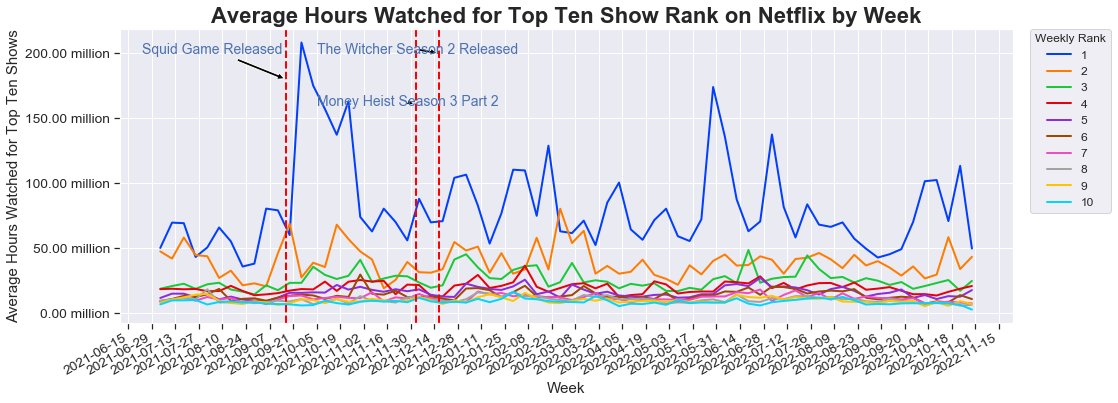

In [104]:
# Plotting hours watched by rank over weeks:
# Average hours viewd for the top 10 shows by week:
# using Seaborn:
# set theme:
sns.set_theme(style="darkgrid", font_scale=1.25,rc={"lines.linewidth": 2,'xtick.bottom': True,
    'ytick.left': True,})
# Set fig and axis, and figure size:
fig, ax = plt.subplots(figsize=(16, 6))
# Set color for lines:
palette = sns.color_palette("bright", 10)
# Create the plot, take out conf int, set color and ax:
g = sns.lineplot(ax=ax, data=netflix_df, x="week", y="weekly_hours_viewed", hue="weekly_rank", palette= palette, ci=None)
# Gen y labels, divide by 1 million and label million:
ylabels = ['{:,.2f}'.format(y) + ' million' for y in g.get_yticks()/1000000]
# Set y labels:
g.set_yticklabels(ylabels)
# Format x label for dates: 
# Define the date format and set it to the x-axis:
date_form = mdates.DateFormatter("%Y-%m-%d") 
ax.xaxis.set_major_formatter(date_form)
# Ensure a major tick for every other week using (interval=2) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
# add minor tick marks on x-axis:
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=2))
# Format for date x-axis, turns date to side:
fig.autofmt_xdate()
# Add titles:
plt.title("Average Hours Watched for Top Ten Show Rank on Netflix by Week",size=22, weight="bold")
plt.xlabel("Week")
plt.ylabel("Average Hours Watched for Top Ten Shows")
# Label legend and move to outside right side:
plt.legend(title='Weekly Rank', fontsize='12', title_fontsize='12', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Add labels to the plot of what show were likely driving large spikes in viewership:
# Squid game: released 2021-9-17
squid_game_rel_date = dt.datetime(2021,9,17) 
style = dict(size=14, color='b')
ax.annotate('Squid Game Released', xy=(squid_game_rel_date, 180000000), xycoords='data', xytext=(dt.datetime(2021,6,23), 200000000), textcoords='data',
arrowprops=dict(arrowstyle='simple', facecolor='black', connectionstyle="arc3"), **style)
plt.axvline(x=squid_game_rel_date, color='red',lw=2,ls='--')

# Next show: The Witcher Season 2
witcher_rel_date = dt.datetime(2021,12,17) 
ax.annotate('The Witcher Season 2 Released', xy=(witcher_rel_date, 200000000), xycoords='data', xytext=(dt.datetime(2021,10,5), 200000000), textcoords='data',
arrowprops=dict(arrowstyle='simple', facecolor='black', connectionstyle="arc3"), **style)
plt.axvline(x=witcher_rel_date, color='red',lw=2,ls='--')

#  Money Heist Season 3 Part 2
moneyHeist_rel_date = dt.datetime(2021,12,3) 
ax.annotate('Money Heist Season 3 Part 2', xy=(moneyHeist_rel_date, 160000000), xycoords='data', xytext=(dt.datetime(2021,10,5), 160000000), textcoords='data',
arrowprops=dict(arrowstyle='simple', facecolor='black', connectionstyle="arc3"), **style)
plt.axvline(x=moneyHeist_rel_date, color='red',lw=2,ls='--')

# Save:
fig.savefig('Average_Hours_TopTenShowsbyWeek.png')

In [3]:
# Look up the shows that may be driving the large spikes in viewing:
# Between 2021-09-05 and 2021-11-05
sept_nov_2021 = netflix_df.loc[(netflix_df["week"]>"2021-09-05")&(netflix_df["week"]<"2021-11-28")]
# groupby Show_title and add up weekly_hours_viewed
sum_most_viewed_sept_nov_2021 = sept_nov_2021.groupby('Show_title').weekly_hours_viewed.sum().sort_values(ascending=False)
sum_most_viewed_sept_nov_2021.head(10)
squid_game_rel_date = dt.datetime(2021,9,17) 
# Top 5:
# Show_title
# squid game              2131320000
# you                      747920000
# maid                     587310000
# sex education            561360000
# money heist              380010000

# Between 2021-11-16 and 2022-01-11
nov_2021_jan_22 = netflix_df.loc[(netflix_df["week"]>"2021-11-16")&(netflix_df["week"]<"2022-01-11")]
# groupby Show_title and add up weekly_hours_viewed
sum_most_viewed_nov_2021_jan_22 = nov_2021_jan_22.groupby('Show_title').weekly_hours_viewed.sum().sort_values(ascending=False)
sum_most_viewed_nov_2021_jan_22.head(10)
# Top 5:
# Show_title
# the witcher          657930000
# money heist          512060000
# the queen of flow    433480000
# don't look up        321520000
# cobra kai            304610000
witcher_rel_date = dt.datetime(2021,12,17) 
moneyHeist_rel_date = dt.datetime(2021,12,3) 

### Plotting most watched shows by week- top ten per category:

In [90]:
# Get the top shows by total hours viewed weekly added up, to plot over time- Top Ten:
# groupby Show_title and add up weekly_hours_viewed
sum_most_viewed= netflix_df.groupby('Show_title').weekly_hours_viewed.sum().sort_values(ascending=False)
topTen_sum_most_viewed = sum_most_viewed.head(10)
# Possible bar chart and could put this in the long time series plot above
topTen_sum_most_viewed_index = topTen_sum_most_viewed.keys()
topTen_sum_most_viewed_df = netflix_df.loc[netflix_df["Show_title"].isin(topTen_sum_most_viewed_index)]

# groupby Show_title and add up weekly_hours_viewed by Top Ten = eng_show_df
sum_most_viewed_eng_show = eng_show_df.groupby('Show_title').weekly_hours_viewed.sum().sort_values(ascending=False)
topTen_sum_most_viewed_eng_show = sum_most_viewed_eng_show.head(10)
topTen_sum_most_viewed_eng_show_index = topTen_sum_most_viewed_eng_show.keys()
topTen_sum_most_viewed_eng_show_df = netflix_df.loc[netflix_df["Show_title"].isin(topTen_sum_most_viewed_eng_show_index)]
# groupby Show_title and add up weekly_hours_viewed by Top Ten = eng_film_df
sum_most_viewed_eng_film = eng_film_df.groupby('Show_title').weekly_hours_viewed.sum().sort_values(ascending=False)
topTen_sum_most_viewed_eng_film = sum_most_viewed_eng_film.head(10)
topTen_sum_most_viewed_eng_film_index = topTen_sum_most_viewed_eng_film.keys()
topTen_sum_most_viewed_eng_film_df = netflix_df.loc[netflix_df["Show_title"].isin(topTen_sum_most_viewed_eng_film_index)]

# # groupby Show_title and add up weekly_hours_viewed by Top Ten = non_eng_show_df
# sum_most_viewed_non_eng_show = non_eng_show_df.groupby('Show_title').weekly_hours_viewed.sum().sort_values(ascending=False)
# topTen_sum_most_viewed_non_eng_show = sum_most_viewed_non_eng_show.head(10)
# # groupby Show_title and add up weekly_hours_viewed by Top Ten = non_eng_film_df
# sum_most_viewed_non_eng_film = non_eng_film_df.groupby('Show_title').weekly_hours_viewed.sum().sort_values(ascending=False)
# topTen_sum_most_viewed_non_eng_film = sum_most_viewed_non_eng_film.head(10)
topTen_sum_most_viewed_eng_film

Show_title
red notice              453990000
don't look up           389580000
the gray man            265980000
the adam project        260520000
purple hearts           240480000
the unforgivable        219550000
hustle                  198310000
the sea beast           190150000
the man from toronto    170820000
senior year             167600000
Name: weekly_hours_viewed, dtype: int64

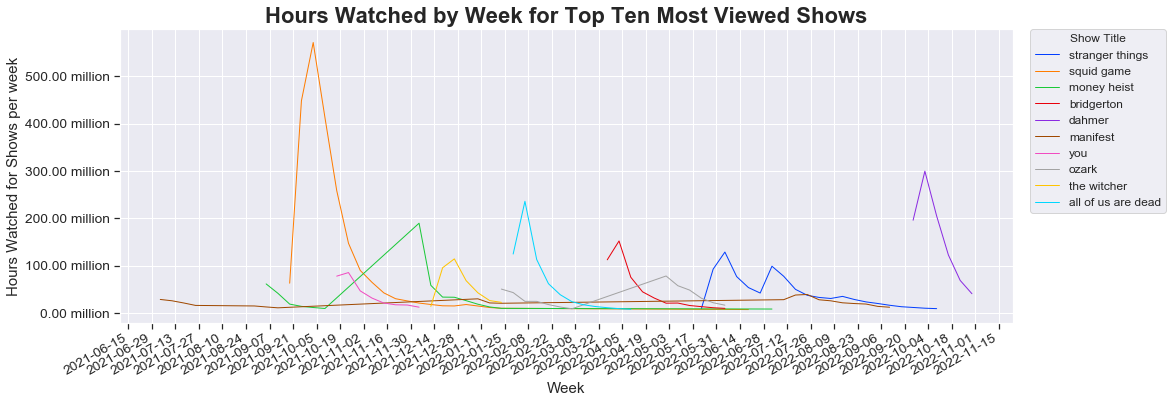

In [99]:
# Plotting hours watched by Top ten shows(total hours viewed) over weeks:
# Average hours viewd for all shows by week:
# using Seaborn:
# set theme:
sns.set_theme(style="darkgrid", font_scale=1.25,rc={"lines.linewidth": 1,'xtick.bottom': True,
    'ytick.left': True,})
# Set fig and axis, and figure size:
fig, ax = plt.subplots(figsize=(16, 6))
# Set color for lines:
palette = sns.color_palette("bright", 10)
# Create the plot, take out conf int, set color and ax:
g = sns.lineplot(ax=ax, data=topTen_sum_most_viewed_df, x="week", y="weekly_hours_viewed", hue="Show_title", ci=None, palette= palette, hue_order = topTen_sum_most_viewed_index)
# Gen y labels, divide by 1 million and label million:
ylabels = ['{:,.2f}'.format(y) + ' million' for y in g.get_yticks()/1000000]
# Set y labels:
g.set_yticklabels(ylabels)
# Format x label for dates: 
# Define the date format and set it to the x-axis:
date_form = mdates.DateFormatter("%Y-%m-%d") 
ax.xaxis.set_major_formatter(date_form)
# Ensure a major tick for every other week using (interval=2) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
# add minor tick marks on x-axis:
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=2))
# Format for date x-axis, turns date to side:
fig.autofmt_xdate()
# Add titles:
plt.title("Hours Watched by Week for Top Ten Most Viewed Shows",size=22, weight="bold")
plt.xlabel("Week")
plt.ylabel("Hours Watched for Shows per week")
handles,labels=ax.get_legend_handles_labels()
sorted_legends= topTen_sum_most_viewed_index #sort the labels based on the average which is on a list
# Label legend and move to outside right side:
# Set order of legend = list of top ten most viewed topTen_sum_most_viewed
ax.legend(title='Show Title', fontsize='12', title_fontsize='12', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Save:
fig.savefig('Hours_TopTenShowsbyWeek.png')

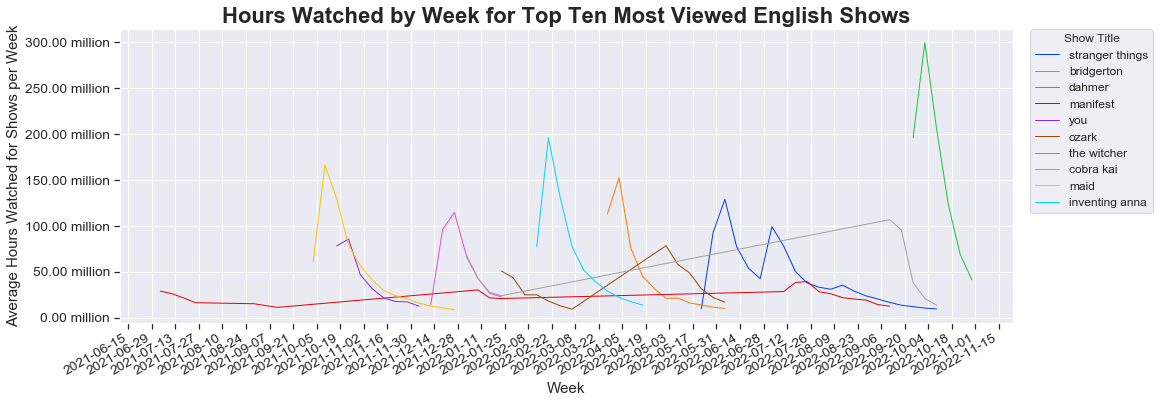

In [100]:
# Plotting hours watched by Top ten Englisth speaking shows(total hours viewed) over weeks:
# Average hours viewd for all shows by week:
# using Seaborn:
# set theme:
sns.set_theme(style="darkgrid", font_scale=1.25,rc={"lines.linewidth": 1,'xtick.bottom': True,
    'ytick.left': True,})
# Set fig and axis, and figure size:
fig, ax = plt.subplots(figsize=(16, 6))
# Set color for lines:
palette = sns.color_palette("bright", 10)
# Create the plot, take out conf int, set color and ax:
g = sns.lineplot(ax=ax, data=topTen_sum_most_viewed_eng_show_df, x="week", y="weekly_hours_viewed", hue="Show_title", ci=None, palette= palette, hue_order = topTen_sum_most_viewed_eng_show_index)
# Gen y labels, divide by 1 million and label million:
ylabels = ['{:,.2f}'.format(y) + ' million' for y in g.get_yticks()/1000000]
# Set y labels:
g.set_yticklabels(ylabels)
# Format x label for dates: 
# Define the date format and set it to the x-axis:
date_form = mdates.DateFormatter("%Y-%m-%d") 
ax.xaxis.set_major_formatter(date_form)
# Ensure a major tick for every other week using (interval=2) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
# add minor tick marks on x-axis:
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=2))
# Format for date x-axis, turns date to side:
fig.autofmt_xdate()
# Add titles:
plt.title("Hours Watched by Week for Top Ten Most Viewed English Shows",size=22, weight="bold")
plt.xlabel("Week")
plt.ylabel("Average Hours Watched for Shows per Week")
handles,labels=ax.get_legend_handles_labels()
sorted_legends= topTen_sum_most_viewed_index #sort the labels based on the average which is on a list
# Label legend and move to outside right side:
# Set order of legend = list of top ten most viewed topTen_sum_most_viewed
ax.legend(title='Show Title', fontsize='12', title_fontsize='12', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Save:
fig.savefig('Hours_TopTenShows_English_byWeek.png')

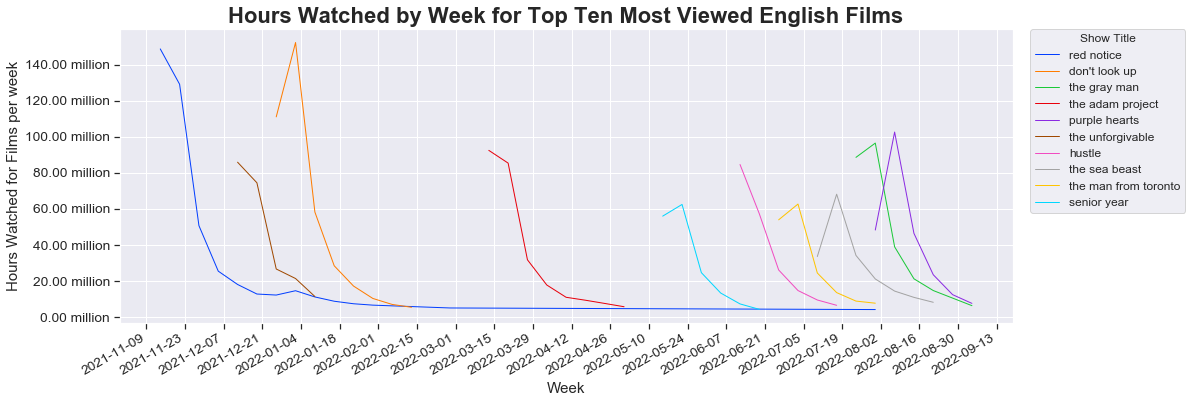

In [101]:
# Plotting hours watched by Top ten English speaking Films (total hours viewed) over weeks:
# Average hours viewd for all shows by week:
# using Seaborn:
# set theme:
sns.set_theme(style="darkgrid", font_scale=1.25,rc={"lines.linewidth": 1,'xtick.bottom': True,
    'ytick.left': True,})
# Set fig and axis, and figure size:
fig, ax = plt.subplots(figsize=(16, 6))
# Set color for lines:
palette = sns.color_palette("bright", 10)
# Create the plot, take out conf int, set color and ax:
g = sns.lineplot(ax=ax, data=topTen_sum_most_viewed_eng_film_df, x="week", y="weekly_hours_viewed", hue="Show_title",  palette= palette, hue_order = topTen_sum_most_viewed_eng_film_index)
# Gen y labels, divide by 1 million and label million:
ylabels = ['{:,.2f}'.format(y) + ' million' for y in g.get_yticks()/1000000]
# Set y labels:
g.set_yticklabels(ylabels)
# Format x label for dates: 
# Define the date format and set it to the x-axis:
date_form = mdates.DateFormatter("%Y-%m-%d") 
ax.xaxis.set_major_formatter(date_form)
# Ensure a major tick for every other week using (interval=2) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
# add minor tick marks on x-axis:
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=2))
# Format for date x-axis, turns date to side:
fig.autofmt_xdate()
# Add titles:
plt.title("Hours Watched by Week for Top Ten Most Viewed English Films",size=22, weight="bold")
plt.xlabel("Week")
plt.ylabel("Hours Watched for Films per week")
handles,labels=ax.get_legend_handles_labels()
sorted_legends= topTen_sum_most_viewed_index #sort the labels based on the average which is on a list
# Label legend and move to outside right side:
# Set order of legend = list of top ten most viewed topTen_sum_most_viewed
ax.legend(title='Show Title', fontsize='12', title_fontsize='12', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Save:
fig.savefig('Hours_TopTenFilms_English_byWeek.png')

In [ ]:
# Production country count: For loop to count up the total times in the data set that a country produces a film or show:
